# $\mathrm{C5HPALD1}$ (C5 hydroperoxy-aldehydes)

In [1]:
using Pkg 
Pkg.activate("../")

  Activating project at `~/gitrepos/activepure/Photolysis.jl/mcm`


In [2]:
using Plots, MLPlotRecipes
using HDF5
using Tables, DataFrames, CSV
using MLJ, MLJGaussianProcesses
using StatsBase 
using KernelFunctions
using ParameterHandling

In [3]:
include("./utils.jl")

filter_outliers (generic function with 1 method)

In [4]:
# load in spectrometer data
hr4000_df = CSV.File("../hr4000_wavelengths.txt") |> DataFrame ; 

# Model Evaluation

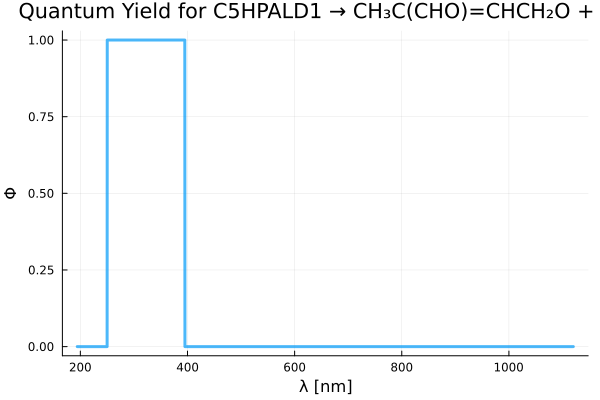

In [5]:
λ = hr4000_df.λ
Φ = zeros(size(λ))

idxs = [idx for idx ∈ 1:size(λ,1) if λ[idx] ≥ 250.0 && λ[idx] ≤ 395.0 ]
Φ[idxs] .= 1.0


p = plot(
    λ,
    Φ,
    xlabel="λ [nm]",
    ylabel="Φ",
    alpha=0.7,
    lw=3,
    label="",
    title="Quantum Yield for C5HPALD1 → CH₃C(CHO)=CHCH₂O + OH"
)

# Output for Photolysis Rate Determination

In [6]:
df_photolysis_Φ = CSV.File("../photolysis_Φ.csv") |> DataFrame

3648×17 DataFrame
  Row │ Φ_1      Φ_2      Φ_3      Φ_4      Φ_6      Φ_5      Φ_7      Φ_8     ⋯
      │ Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64 ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │     1.0      0.0      0.0      1.0      1.0      0.0      1.0      0.0 ⋯
    2 │     1.0      0.0      0.0      1.0      1.0      0.0      1.0      0.0
    3 │     1.0      0.0      0.0      1.0      1.0      0.0      1.0      0.0
    4 │     1.0      0.0      0.0      1.0      1.0      0.0      1.0      0.0
    5 │     1.0      0.0      0.0      1.0      1.0      0.0      1.0      0.0 ⋯
    6 │     1.0      0.0      0.0      1.0      1.0      0.0      1.0      0.0
    7 │     1.0      0.0      0.0      1.0      1.0      0.0      1.0      0.0
    8 │     1.0      0.0      0.0      1.0      1.0      0.0      1.0      0.0
    9 │     1.0      0.0      0.0      1.0      1.0      0.0      1.0      0.0 ⋯
   10 │     1.0      0.0      0.0      1.0      1.0      0.0      1.0      0.0
   11 │     1.0      0.0      0.0      1.0      1.0      0.0      1.0      0.0
  ⋮   │    ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮    ⋱
 3639 │     0.0      1.0      1.0      0.0      0.0      0.0      0.0      1.0
 3640 │     0.0      1.0      1.0      0.0      0.0      0.0      0.0      1.0 ⋯
 3641 │     0.0      1.0      1.0      0.0      0.0      0.0      0.0      1.0
 3642 │     0.0      1.0      1.0      0.0      0.0      0.0      0.0      1.0
 3643 │     0.0      1.0      1.0      0.0      0.0      0.0      0.0      1.0
 3644 │     0.0      1.0      1.0      0.0      0.0      0.0      0.0      1.0 ⋯
 3645 │     0.0      1.0      1.0      0.0      0.0      0.0      0.0      1.0
 3646 │     0.0      1.0      1.0      0.0      0.0      0.0      0.0      1.0
 3647 │     0.0      1.0      1.0      0.0      0.0      0.0      0.0      1.0
 3648 │     0.0      1.0      1.0      0.0      0.0      0.0      0.0      1.0 ⋯
                                                 9 columns and 3627 rows omitted

In [7]:
df_photolysis_Φ.Φ_20 = Φ

describe(df_photolysis_Φ)

18×7 DataFrame
 Row │ variable  mean         min      median   max       nmissing  eltype   
     │ Symbol    Float64      Float64  Float64  Float64   Int64     DataType 
─────┼───────────────────────────────────────────────────────────────────────
   1 │ Φ_1       0.114981         0.0      0.0  1.0              0  Float64
   2 │ Φ_2       0.885019         0.0      1.0  1.0              0  Float64
   3 │ Φ_3       0.963542         0.0      1.0  1.0              0  Float64
   4 │ Φ_4       0.214167         0.0      0.0  1.0              0  Float64
   5 │ Φ_6       0.426121         0.0      0.0  1.0              0  Float64
   6 │ Φ_5       0.00986771       0.0      0.0  0.344696         0  Float64
   7 │ Φ_7       0.211623         0.0      0.0  1.0              0  Float64
   8 │ Φ_8       0.945175         0.0      1.0  1.0              0  Float64
   9 │ Φ_11      0.0470227        0.0      0.0  0.73106          0  Float64
  10 │ Φ_12      0.0453115        0.0      0.0  0.709551         0  Float64
  11 │ Φ_13      0.107152         0.0      0.0  1.0              0  Float64
  12 │ Φ_14      0.120067         0.0      0.0  1.00951          0  Float64
  13 │ Φ_15      0.0195148        0.0      0.0  0.21             0  Float64
  14 │ Φ_16      0.00929276       0.0      0.0  0.1              0  Float64
  15 │ Φ_17      0.120067         0.0      0.0  1.00951          0  Float64
  16 │ Φ_18      0.000291324      0.0      0.0  0.00195          0  Float64
  17 │ Φ_19      0.000291324      0.0      0.0  0.00195          0  Float64
  18 │ Φ_20      0.149397         0.0      0.0  1.0              0  Float64

In [8]:
CSV.write("../photolysis_Φ.csv", df_photolysis_Φ)

"../photolysis_Φ.csv"